# Name : Sajin Raj Amatya


# 1) Importing  the necessary libraries for data analysis 


In [29]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import missingno as msno
import pingouin as pg
import plotly.express as px

# 2) Loading the dataset

In [3]:
data = pd.read_csv("Unemployment in India.csv")

# 3) Explorative Data Analysis

## 3.1) Data Inspection 

In [4]:

print(data.head(20))

            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0   Andhra Pradesh   31-05-2019    Monthly                              3.65   
1   Andhra Pradesh   30-06-2019    Monthly                              3.05   
2   Andhra Pradesh   31-07-2019    Monthly                              3.75   
3   Andhra Pradesh   31-08-2019    Monthly                              3.32   
4   Andhra Pradesh   30-09-2019    Monthly                              5.17   
5   Andhra Pradesh   31-10-2019    Monthly                              3.52   
6   Andhra Pradesh   30-11-2019    Monthly                              4.12   
7   Andhra Pradesh   31-12-2019    Monthly                              4.38   
8   Andhra Pradesh   31-01-2020    Monthly                              4.84   
9   Andhra Pradesh   29-02-2020    Monthly                              5.91   
10  Andhra Pradesh   31-03-2020    Monthly                              4.06   
11  Andhra Pradesh   30-04-2020    Month

### Printing out the last rows of the Dataframe 

In [5]:
print(data.tail())

    Region  Date  Frequency   Estimated Unemployment Rate (%)  \
763    NaN   NaN        NaN                               NaN   
764    NaN   NaN        NaN                               NaN   
765    NaN   NaN        NaN                               NaN   
766    NaN   NaN        NaN                               NaN   
767    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
763                  NaN                                       NaN  NaN  
764                  NaN                                       NaN  NaN  
765                  NaN                                       NaN  NaN  
766                  NaN                                       NaN  NaN  
767                  NaN                                       NaN  NaN  


### Inspecting the datatype of each column of the Dataframe 

In [6]:
data.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

### Printing out the information about the Dataframe 

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


### Statistical Summary of the column with numeric datatype 

In [8]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


### columns of a dataframe 

In [9]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

### Removing the whitespaces from the name of the columns 

In [10]:
data.columns = data.columns.str.strip()


## 3.2) Univariate Analysis 


### Inspecting the distribution of Estimated Unemployment Rate (%) by using histogram 

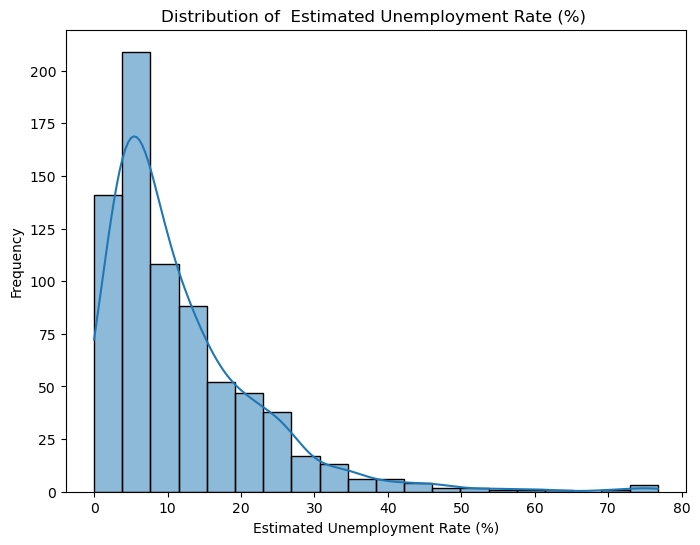

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(data['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of  Estimated Unemployment Rate (%) ')
plt.show()

###  Inspecting the distribution of Estimated Labour Participation Rate (%) by using histogram 

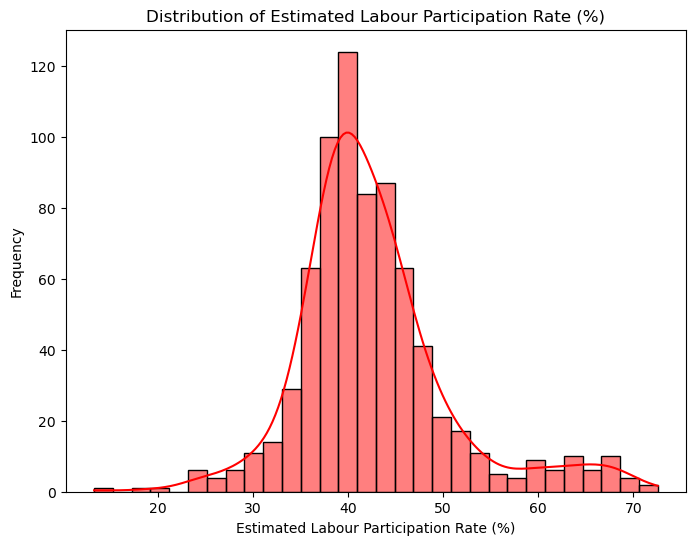

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(data['Estimated Labour Participation Rate (%)'],kde=True,bins=30,color='red')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Labour Participation Rate (%)')
plt.show()

### Inspecting the distribution of Estimated Employed  by using violin plot 

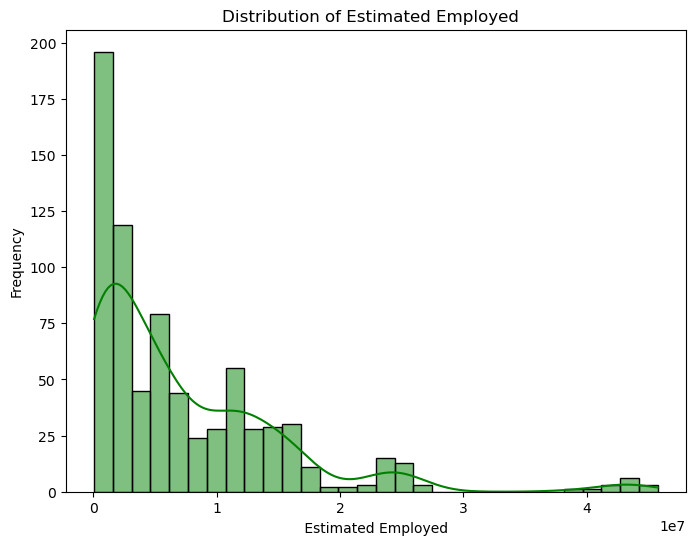

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(data['Estimated Employed'],kde=True,bins=30,color='green')
plt.xlabel(' Estimated Employed ')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Employed  ')
plt.show()

### Inspecting Region column using bar plot 


(0.0, 30.0)

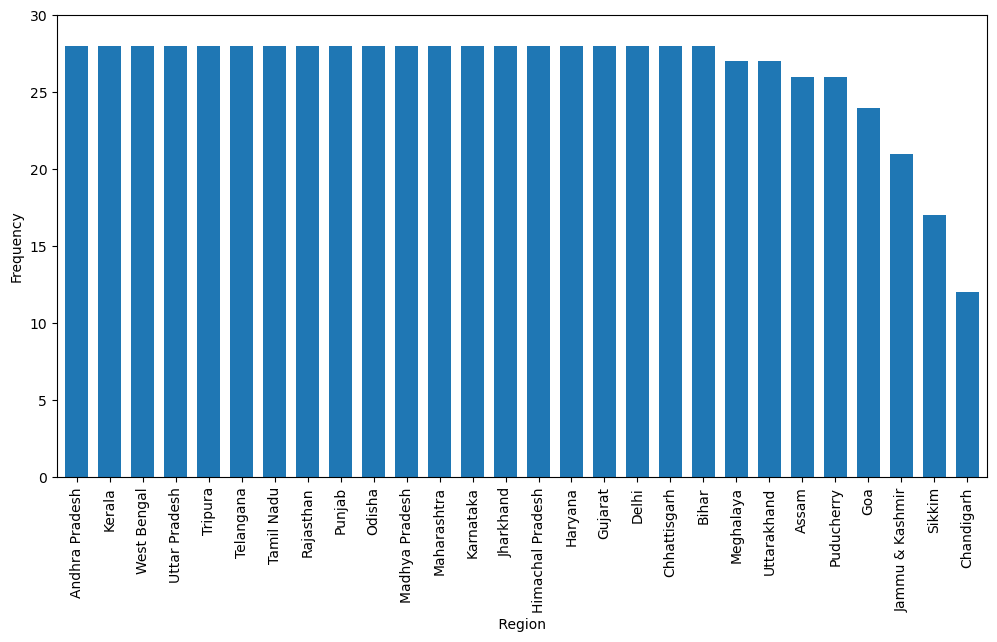

In [22]:
plt.figure(figsize=(12,6))
sns.color_palette("hls", 8)

data['Region'].value_counts().plot(kind='bar',width=0.7)
plt.xlabel(' Region ')
plt.ylabel('Frequency')
plt.ylim(0,30)

### Inspection of Area column of a dataframe 

([<matplotlib.patches.Wedge at 0x226c1aad130>,
 [Text(-0.051350606033972866, 1.0988007623131428, 'Urban'),
  Text(0.051350606033972734, -1.0988007623131428, 'Rural')],
 [Text(-0.02800942147307611, 0.5993458703526233, '51%'),
  Text(0.028009421473076033, -0.5993458703526233, '49%')])

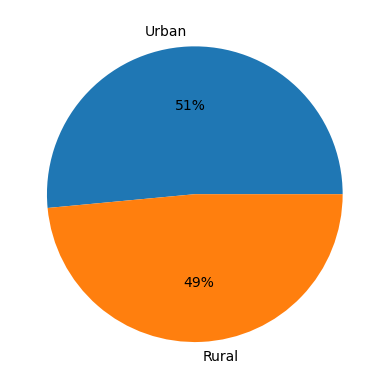

In [14]:

area = data['Area'].value_counts()
plt.pie(area,labels=area.keys(),autopct='%.0f%%')

In [15]:
data['Date'].dtypes  

dtype('O')

## 3.3) Outlier

### Outlier detection using box plot 

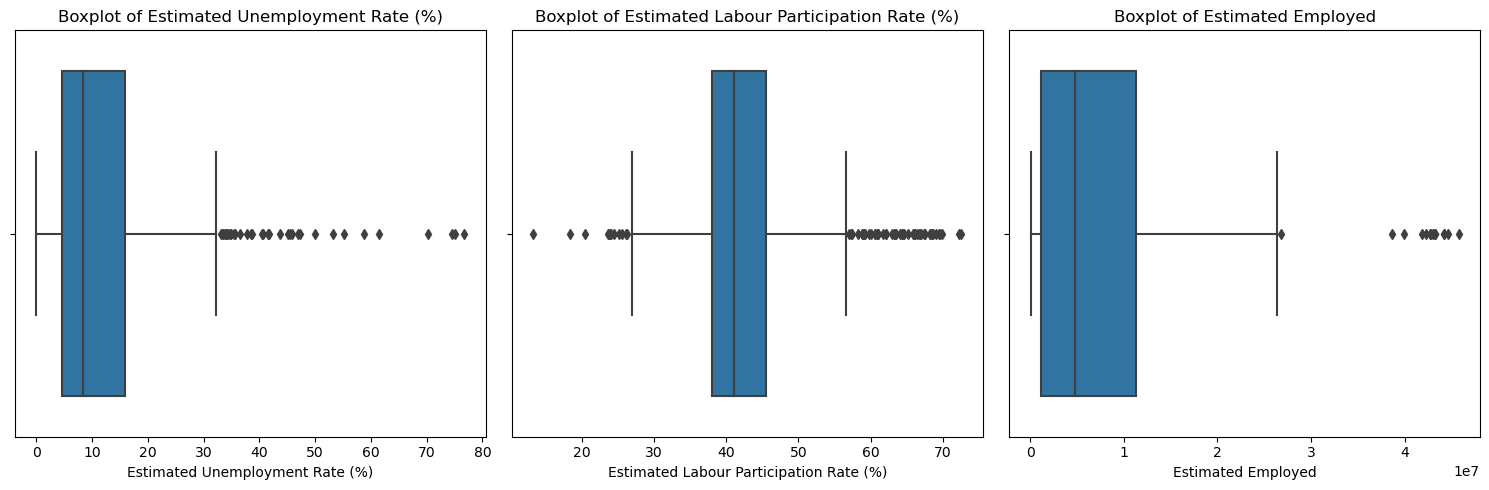

In [17]:
# Create a figure with subplots for each column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.boxplot(x=data['Estimated Unemployment Rate (%)'], ax=axes[0])
axes[0].set_xlabel('Estimated Unemployment Rate (%)')
axes[0].set_title('Boxplot of Estimated Unemployment Rate (%)')


sns.boxplot(x=data['Estimated Labour Participation Rate (%)'], ax=axes[1])
axes[1].set_xlabel('Estimated Labour Participation Rate (%)')
axes[1].set_title('Boxplot of Estimated Labour Participation Rate (%)')


sns.boxplot(x=data['Estimated Employed'], ax=axes[2])
axes[2].set_xlabel('Estimated Employed')
axes[2].set_title('Boxplot of Estimated Employed')

plt.tight_layout()
plt.show()

### Removing outlier using interquartile range method

In [13]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Remove outliers from Column1
data['Estimated Unemployment Rate (%)'] = remove_outliers(data['Estimated Unemployment Rate (%)'])

# Remove outliers from Column2
data['Estimated Labour Participation Rate (%)'] = remove_outliers(data['Estimated Labour Participation Rate (%)'])

# Remove outliers from Column3
data['Estimated Employed'] = remove_outliers(data['Estimated Employed'])

### box plot after removing outlier 

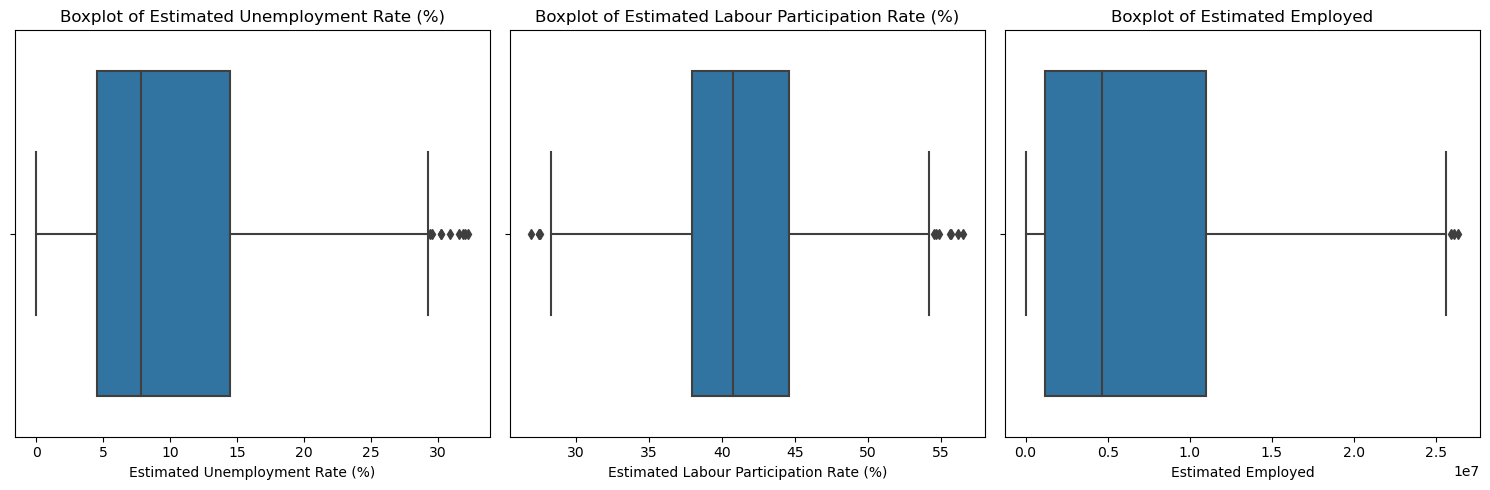

In [19]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.boxplot(x=data['Estimated Unemployment Rate (%)'], ax=axes[0])
axes[0].set_xlabel('Estimated Unemployment Rate (%)')
axes[0].set_title('Boxplot of Estimated Unemployment Rate (%)')


sns.boxplot(x=data['Estimated Labour Participation Rate (%)'], ax=axes[1])
axes[1].set_xlabel('Estimated Labour Participation Rate (%)')
axes[1].set_title('Boxplot of Estimated Labour Participation Rate (%)')

sns.boxplot(x=data['Estimated Employed'], ax=axes[2])
axes[2].set_xlabel('Estimated Employed')
axes[2].set_title('Boxplot of Estimated Employed')


plt.tight_layout()
plt.show()

## 3.4) Bivarate Analysis


### Correlation matrix (heatmap)

<AxesSubplot:>

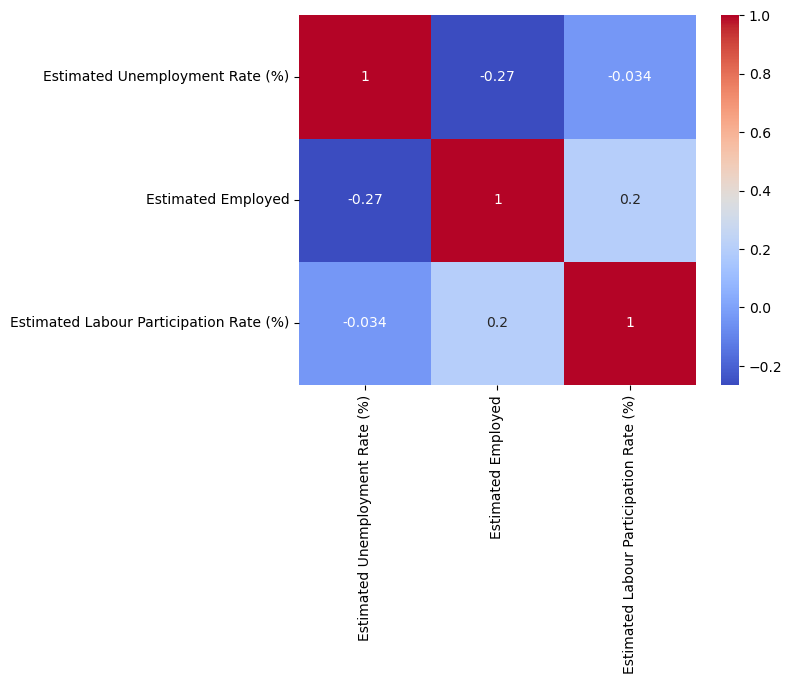

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

### Regression analysis between Estimated Employed and Estimated Unemployment Rate (%)

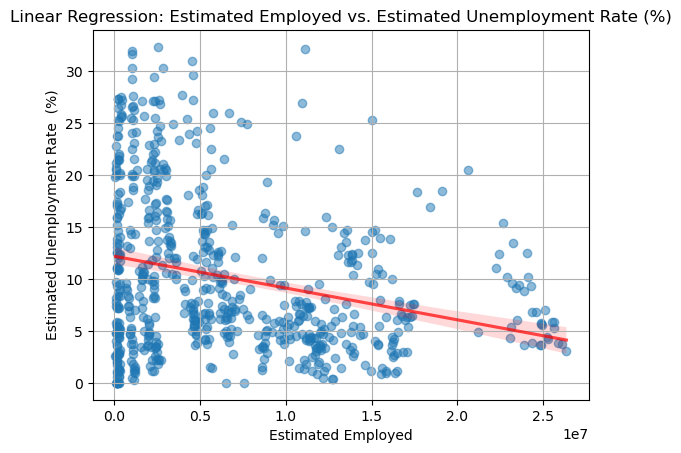

In [14]:
sns.regplot(y='Estimated Unemployment Rate (%)', x='Estimated Employed', data=data,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})
plt.ylabel('Estimated Unemployment Rate  (%)')
plt.xlabel('Estimated Employed')
plt.title('Linear Regression: Estimated Employed vs. Estimated Unemployment Rate (%)')
plt.grid(True)

### Regression analysis between Estimated Employed and Estimated Labour Participation Rate (%) 

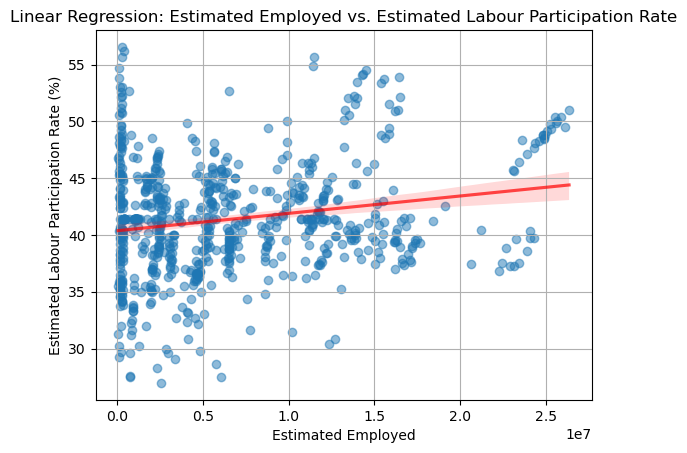

In [84]:
sns.regplot(y='Estimated Labour Participation Rate (%)', x='Estimated Employed', data=data,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Linear Regression: Estimated Employed vs. Estimated Labour Participation Rate')
plt.grid(True)

### Regression analysis between Estimated Unemployment Rate (%) and Estimated Labour Participation Rate (%)

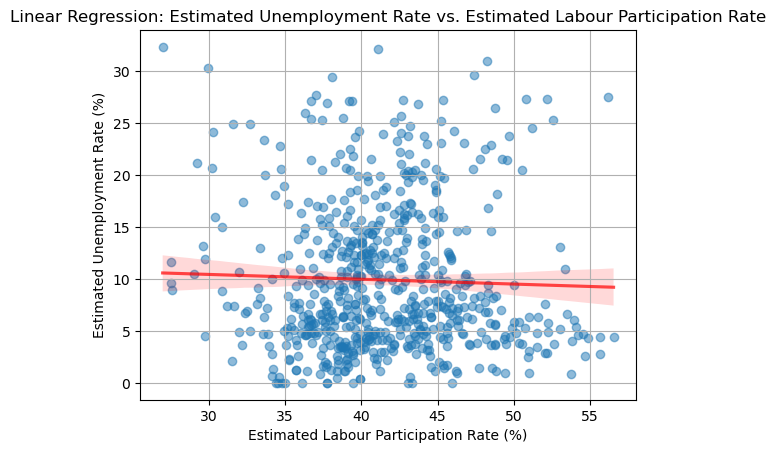

In [16]:
sns.regplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', data=data,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Linear Regression: Estimated Unemployment Rate vs. Estimated Labour Participation Rate')
plt.grid(True)

### Pairwise bivariate distributions

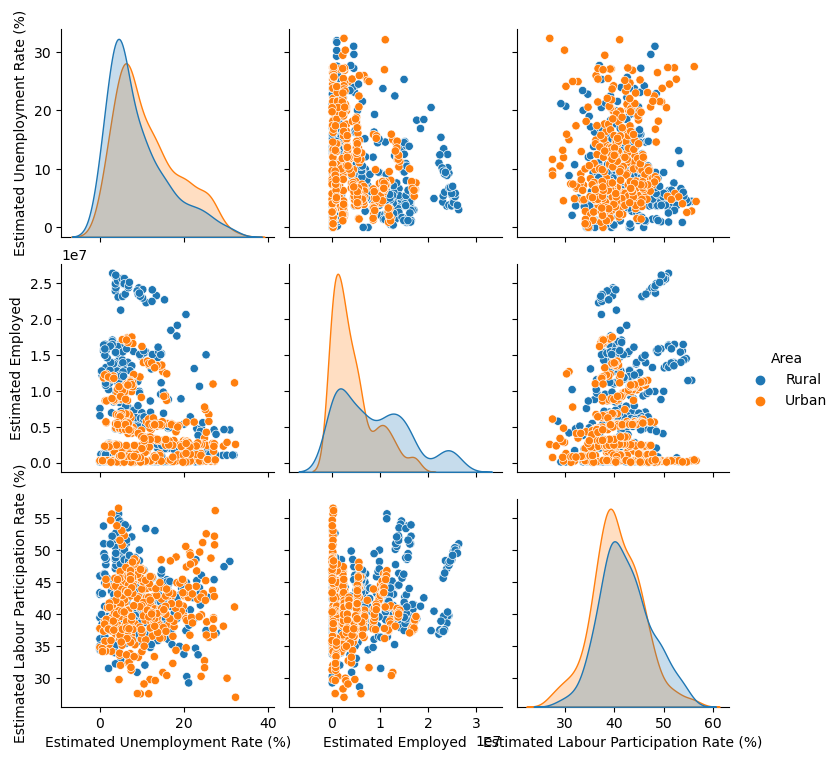

In [17]:
sns.pairplot(data,diag_kind='kde',hue='Area')
plt.xticks(rotation = 180)
plt.show()

### bivariate analysis between Region column and Area column 


In [13]:
 cross = pd.crosstab(data['Region'],data['Area'])

### Visualization of the cross tabulation using stacked bar 

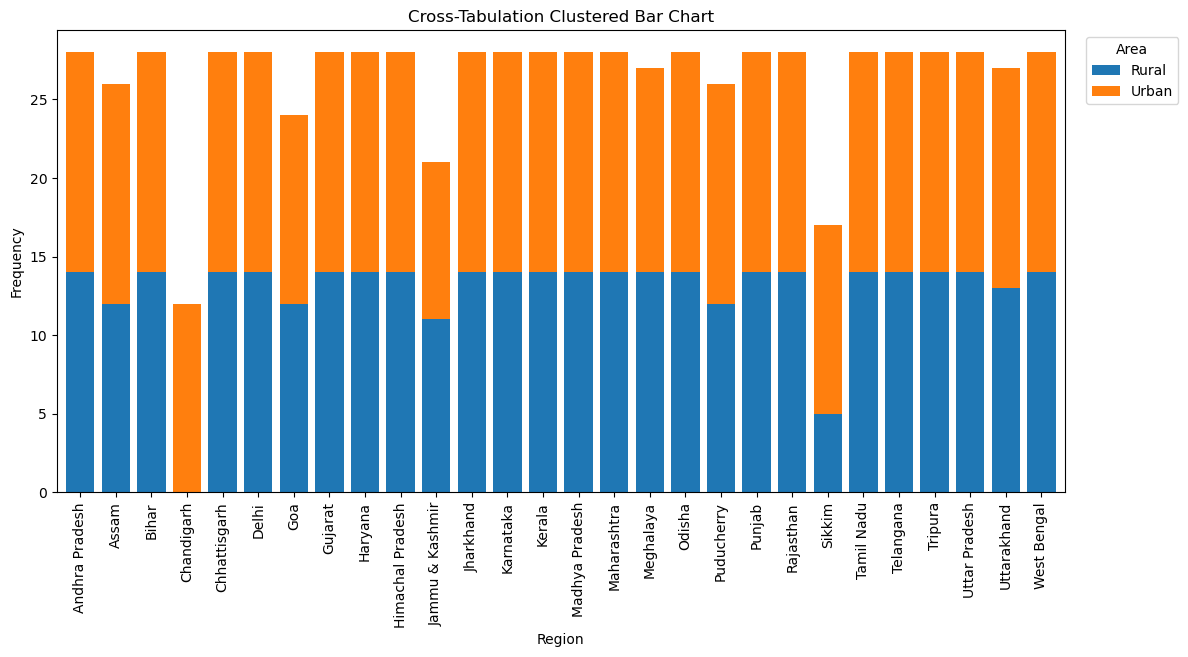

In [28]:
cross.plot(kind='bar', stacked=True, figsize=(13, 6),width=0.8)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Cross-Tabulation Clustered Bar Chart')
plt.legend(title='Area', loc='upper right', bbox_to_anchor=(1.12, 1.0))
plt.show()

# 4) Data Cleaning

## Inspection of missing value in Dataframe

In [18]:
#checking the total number of null values in each column of dataframe 
data.isna().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            63
Estimated Employed                         43
Estimated Labour Participation Rate (%)    91
Area                                       28
dtype: int64

## Visualization of missing value 

<AxesSubplot:>

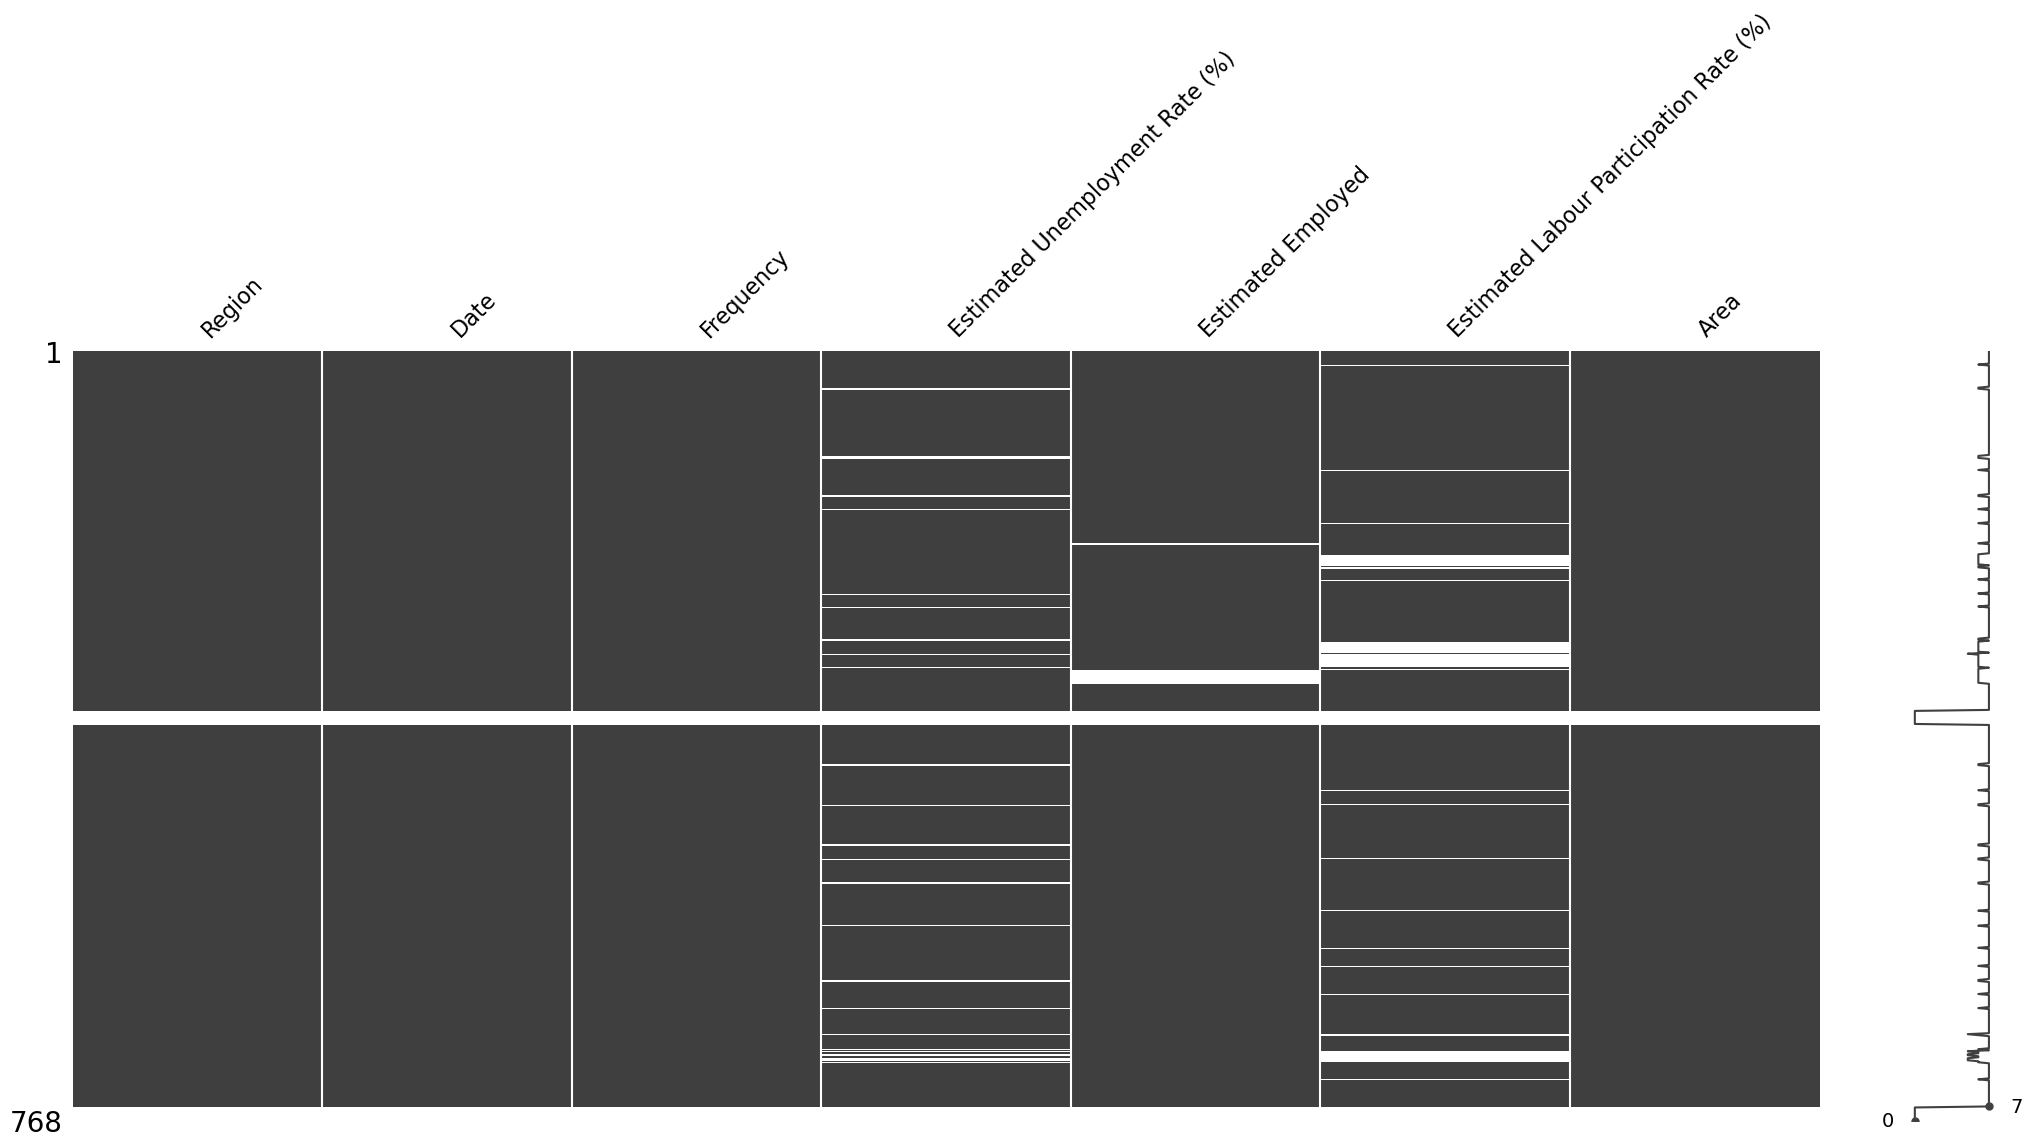

In [19]:
msno.matrix(data)

## Printing out the rows with missing values 

In [20]:
#Displaying the data with null values 
data[data.isna().any(axis=1)]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
14,Assam,31-05-2019,Monthly,4.29,11749334.0,NaN,Rural
37,Bihar,30-04-2020,Monthly,NaN,14645275.0,38.63,Rural
38,Bihar,31-05-2020,Monthly,NaN,14050319.0,38.50,Rural
105,Haryana,30-04-2020,Monthly,NaN,4041050.0,49.85,Rural
106,Haryana,31-05-2020,Monthly,NaN,3914193.0,42.78,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing the rows if it contains all  missing values  



In [21]:
# removing rows with null values 
data.dropna(axis=0, how ='all',inplace=True)

## Displaying the missing total number of missing value after removal of row which contain all the missing value 

In [22]:
#After removing the rows with null values 
data.isna().sum()

Region                                      0
Date                                        0
Frequency                                   0
Estimated Unemployment Rate (%)            35
Estimated Employed                         15
Estimated Labour Participation Rate (%)    63
Area                                        0
dtype: int64

### Imputing the missing value of Estimated Unemployment Rate (%) , Estimated Employed and Estimated Labour Participation Rate (%)  with its mean 

In [23]:
data['Estimated Unemployment Rate (%)'] = data['Estimated Unemployment Rate (%)'].fillna(data['Estimated Unemployment Rate (%)'].mean())
data['Estimated Employed'] = data['Estimated Employed'].fillna(data['Estimated Employed'].mean())
data['Estimated Labour Participation Rate (%)'] = data['Estimated Labour Participation Rate (%)'].fillna(data['Estimated Labour Participation Rate (%)'].mean())


## After imputation process 

In [24]:
data.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

## Removing white spaces for the frequency column 

In [25]:
data['Frequency'].value_counts()

Monthly     381
 Monthly    359
Name: Frequency, dtype: int64

In [26]:
data['Frequency']=data['Frequency'].str.strip()

In [27]:
data['Frequency'].value_counts()

Monthly    740
Name: Frequency, dtype: int64

# 4) Statistical Analysis 

## Average Unemployment Rate based on the Region of India 

In [24]:
mean_region = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
print(mean_region)

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: Estimated Unemployment Rate (%), dtype: float64


Text(0.5, 1.0, 'Average unemployment rate based on the region of india')

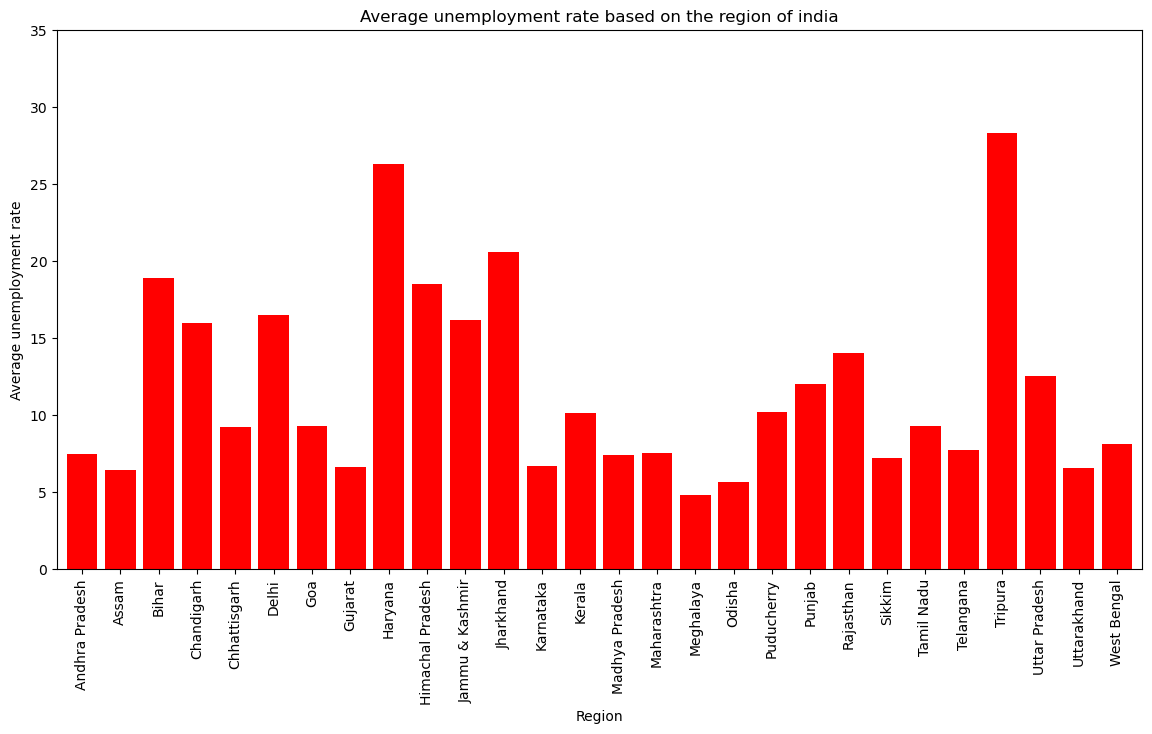

In [26]:
plt.figure(figsize=(14,7))
mean_region.plot(kind='bar',color='red',width=0.8)
plt.ylim(0,35)
plt.xlabel('Region')
plt.ylabel('Average unemployment rate')
plt.title('Average unemployment rate based on the region of india')

# Average unemployment Rate based on type of Area in India 

In [35]:
mean_area = data.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
print(mean_area)

Area
Rural    10.324791
Urban    13.166614
Name: Estimated Unemployment Rate (%), dtype: float64


(0.0, 15.0)

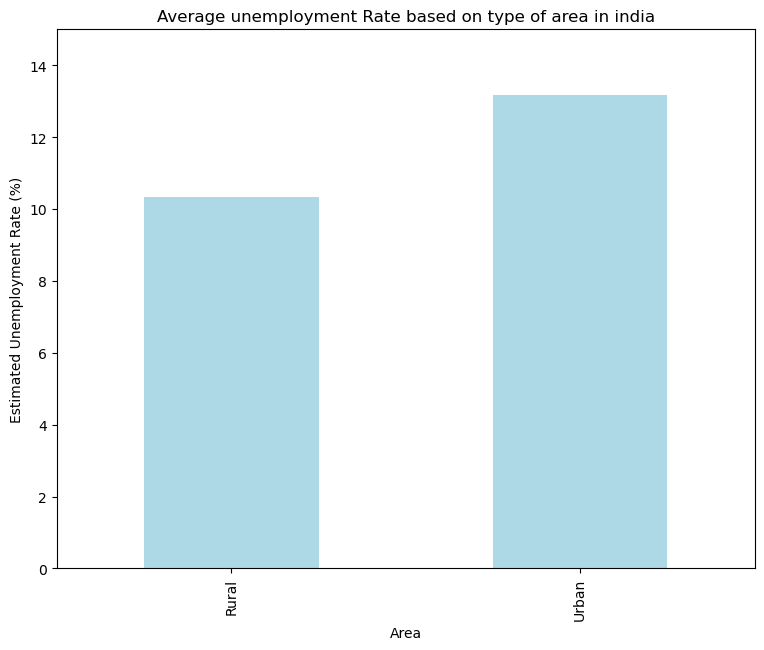

In [36]:
plt.figure(figsize=(9,7))
mean_area.plot(kind="bar",color='lightblue')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Average unemployment Rate based on type of area in india')
plt.ylim(0,15)

## Average unemployment rate based on Reion and area of india

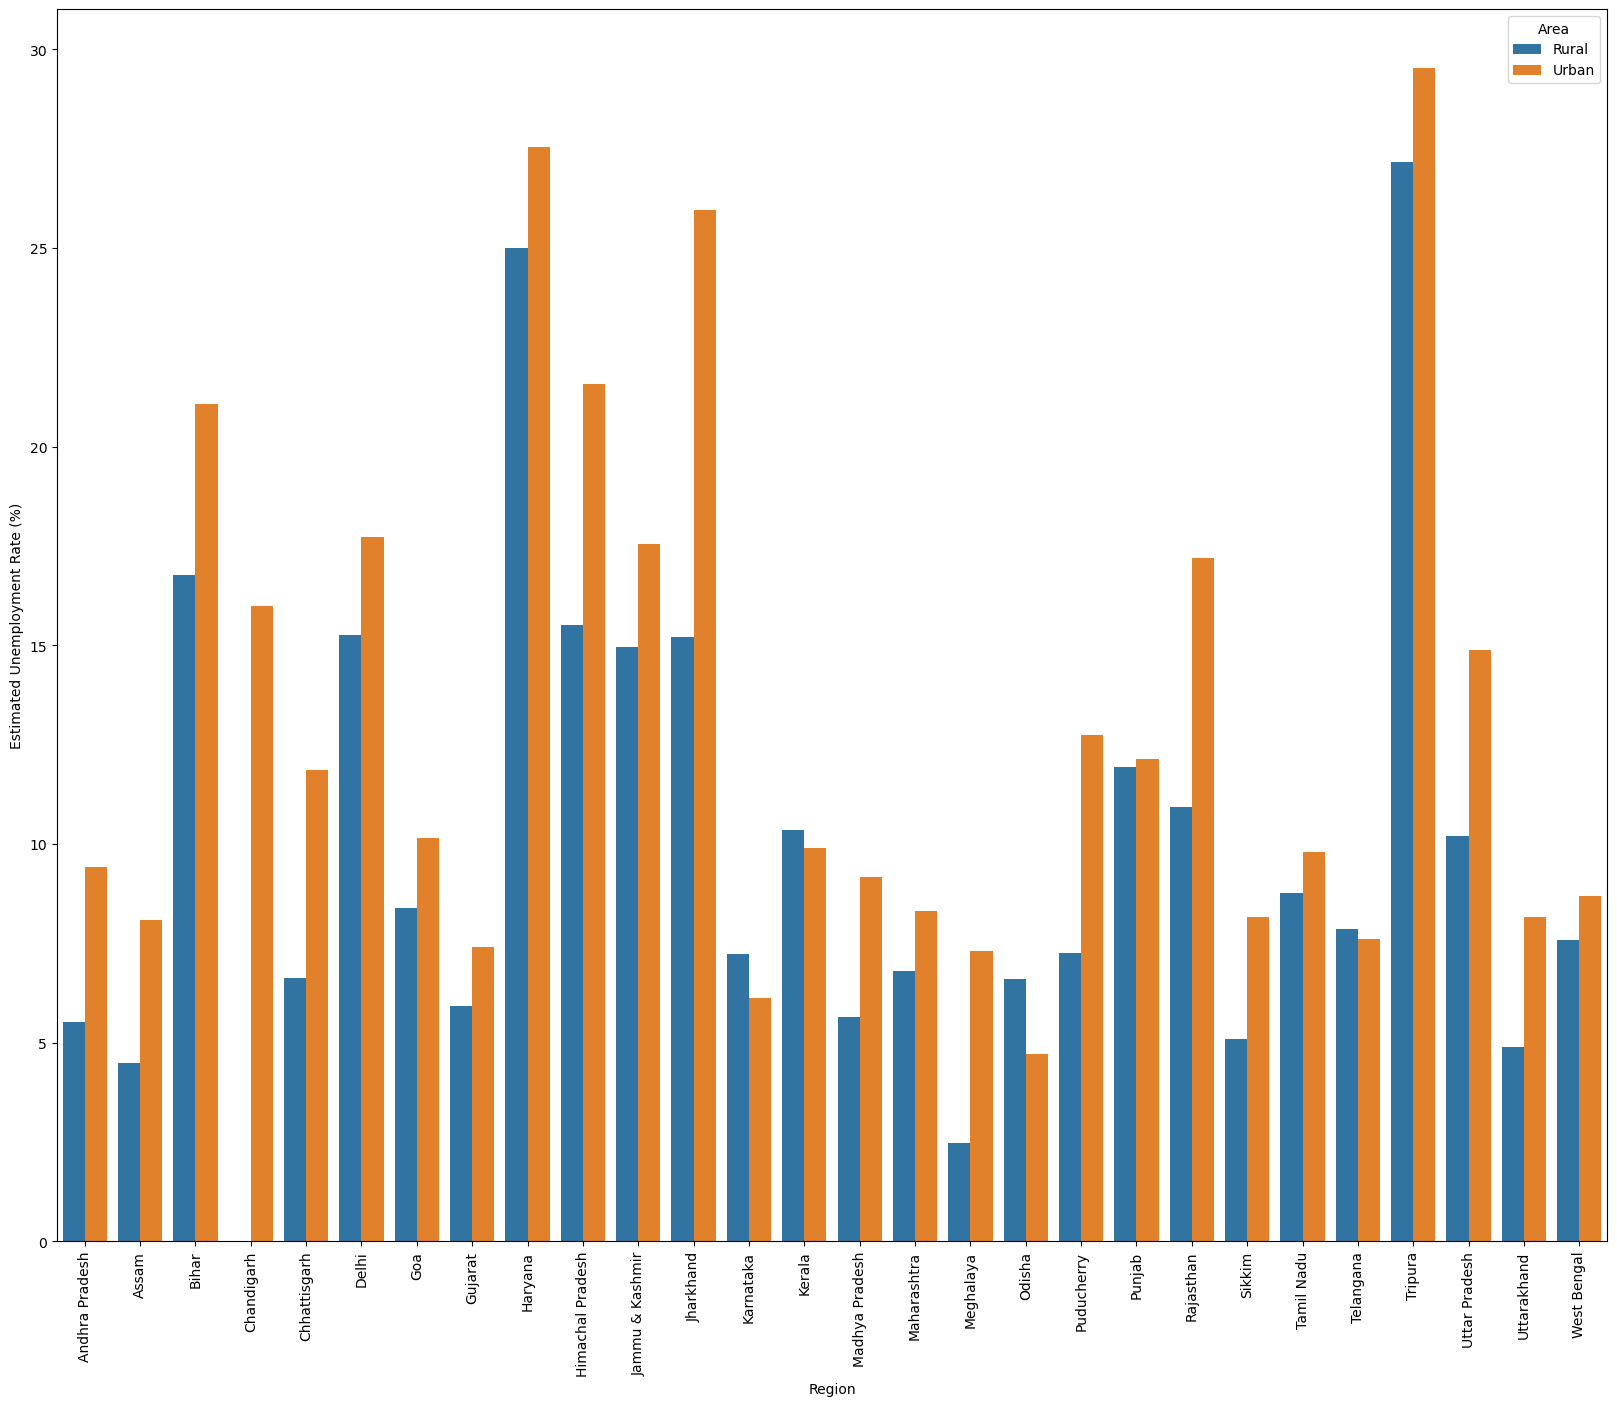

In [46]:
average = data.groupby(['Region', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(20, 16))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', hue='Area', data=average)
plt.xticks(rotation=90)
plt.show()

# Hypothesis testing 

## comparing estimated unemployment Rate between Rural and Urban area using t test

In [55]:
area_rural = data[data['Area'] == 'Rural']
area_urban = data[data['Area'] == 'Urban']

# Assuming you want to compare the unemployment rates
unemployment_r = area_rural['Estimated Unemployment Rate (%)']
unemployment_u = area_urban['Estimated Unemployment Rate (%)']

test = pg.ttest(unemployment_r,unemployment_u)
print(test)   

               T         dof alternative     p-val           CI95%   cohen-d  \
T-test -4.215189  737.104756   two-sided  0.000028  [-3.25, -1.18]  0.309816   

           BF10     power  
T-test  455.939  0.987668  


### There is a significant difference between the esitimated unemployment rate in urban and rural area which is not caused by the random chance. 
